In [21]:
pip install sounddevice scipy


In [22]:
# Cell 1: Import libraries
import sounddevice as sd
from scipy.io.wavfile import write
import numpy as np
import os

# Config
duration = 10  # seconds
fs = 44100    # sample rate
output_path = "output.wav"

print("Ready to record...")


Ready to record...


In [23]:
# Cell 2: Record from mic and save
print("🎤 Recording for 10 seconds...")
audio = sd.rec(int(duration * fs), samplerate=fs, channels=1, dtype='int16')
sd.wait()  # Wait until recording is finished
write(output_path, fs, audio)  # Save as WAV file
print(f"✅ Saved to: {os.path.abspath(output_path)}")


🎤 Recording for 10 seconds...
✅ Saved to: C:\myLLM\output.wav


In [24]:
# Cell 3: Optional playback inside notebook
from IPython.display import Audio
Audio(output_path)


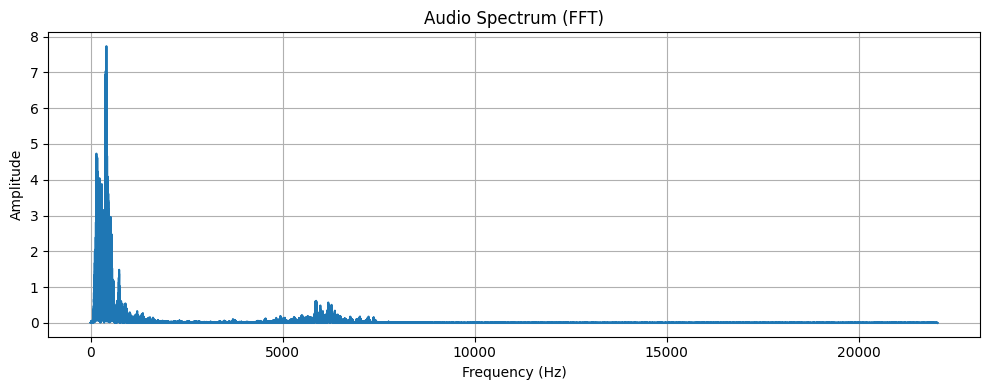

In [25]:
# Cell 4: Plot spectrum (FFT)
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Read audio data
rate, data = wavfile.read(output_path)

# If stereo, convert to mono
if len(data.shape) > 1:
    data = data[:, 0]

# FFT
n = len(data)
fft = np.fft.fft(data)
freqs = np.fft.fftfreq(n, d=1/rate)
amplitudes = np.abs(fft) / n

# Plot only the positive frequencies
half_n = n // 2
plt.figure(figsize=(10, 4))
plt.plot(freqs[:half_n], amplitudes[:half_n])
plt.title("Audio Spectrum (FFT)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()


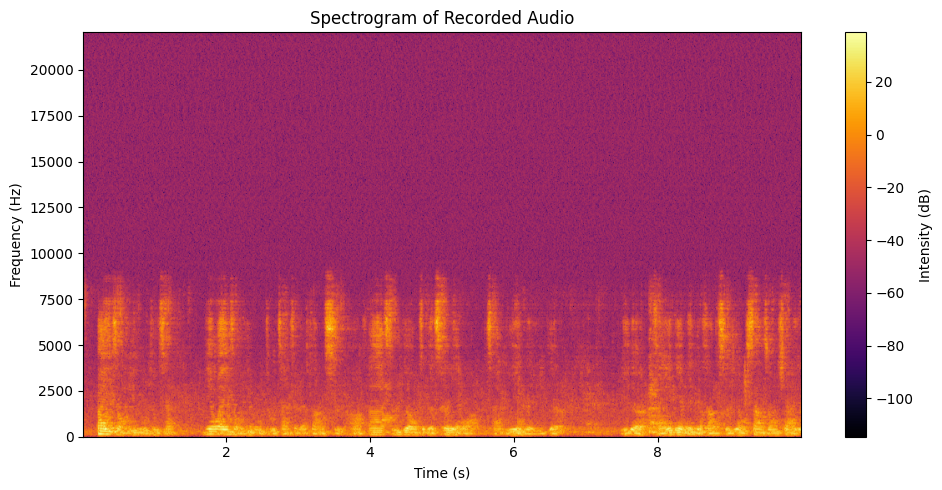

In [26]:
# Cell 4: Spectrogram (Heatmap)
import matplotlib.pyplot as plt
from scipy.io import wavfile
import numpy as np

# Load the recorded WAV file
rate, data = wavfile.read(output_path)

# If stereo, convert to mono
if len(data.shape) > 1:
    data = data[:, 0]

# Create spectrogram
plt.figure(figsize=(10, 5))
plt.specgram(data, Fs=rate, NFFT=1024, noverlap=512, cmap='inferno')

# Labels
plt.title("Spectrogram of Recorded Audio")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label="Intensity (dB)")
plt.tight_layout()
plt.show()
